<a href="https://colab.research.google.com/github/AjmalSarwary/invest_ml/blob/master/code/gmv_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#General Minimum Volatility (GMV) Portfolio Strategy

In this notebook, I delve into the General Minimum Volatility (GMV) strategy, an approach that circumvents the complexities and uncertainties associated with estimating expected returns in portfolio management.

##The Challenge of Estimating Expected Returns:
Estimating expected returns is fraught with difficulty due to market unpredictability. Small errors in these estimates, when used in optimization models, can lead to drastic shifts in investment allocations, pushing portfolios towards risky compositions.

##The GMV Approach:
To tackle this, I focus on the GMV strategy, which minimizes volatility without estimating expected returns. Constructed based on the covariance matrix of asset returns, the GMV portfolio aims for the lowest possible volatility, offering a stable method for portfolio construction in uncertain scenarios.

##Implementation and Analysis:
In this notebook, I will implement the GMV strategy, analyze its performance, and compare it to other methods. I'll examine how GMV stands as a robust alternative when return predictions are unfeasible or risky.

In [7]:
!git clone https://github.com/ajmalsarwary/invest_ml.git
%cd /content/invest_ml
import sys
sys.path.append('/content/invest_ml/code')

Cloning into 'invest_ml'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 169 (delta 47), reused 120 (delta 34), pack-reused 0
Receiving objects: 100% (169/169), 1.47 MiB | 14.88 MiB/s, done.
Resolving deltas: 100% (47/47), done.
/content/invest_ml


In [8]:
import invest_risk_kit as rk
import pandas as pd
import numpy as np

In [9]:
# Using the `get_ind_returns()` function from the 'rk' module to fetch historical returns
# for different industry portfolios where each column represents an industry,
# and each row represents a time period
ind = rk.get_ind_returns()

# Calculating baseline for annual returns (simplified expected retruns) from historic retruns
# therefore, annualizing historic returns using the `annualize_rets()` function
# this function converts any-periodic returns to annualized returns
# here, it's applied to the data from 1996 to 2000, and assumes 12 periods in a year
er = rk.annualize_rets(ind["1996":"2000"], 12)

# From historic returns, calculating the covariance matrix for the same period, joint variability between the returns of
# the industries, indicative of how different industries' returns move together
cov = ind["1996":"2000"].cov()

# Defining a list with the industries of interest. In this case, I am focusing on 'Food' and 'Steel'.
l = ['Food', 'Steel']

# Using the `msr()` function from the 'rk' module to find the weights of the maximum Sharpe ratio portfolio
# the arguments are: a risk-free rate (10% in this example), the annualized returns for the selected
# industries, and the covariance matrix for those industries
# this function calculates which combination of 'Food' and 'Steel' will yield the highest expected
# return per unit of risk, given the risk-free rate.
rk.msr(0.1, er[l], cov.loc[l,l])

array([0.75040362, 0.24959638])

In [10]:
# expected returns
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [11]:
# Returns Estimation 1
# Error maximizing nature of Markowitz(optimizers): minor estimation error can lead to massive shit in weights
# Guessing expected returns close to er[l]
# find the weights of the maximum Sharpe ratio portfolio for the guessed returns
print('weights for guessed returns: ', rk.msr(0.1, np.array([.11, .12]), cov.loc[l,l]))
print('weights for er[l]: ' ,rk.msr(0.1, er[l], cov.loc[l,l]))

weights for guessed returns:  [0.57930354 0.42069646]
weights for er[l]:  [0.75040362 0.24959638]


In [12]:
# Returns Estimation 2
# Error maximizing nature of Markowitz(optimizers): minor estimation error can lead to massive shit in weights
# Guessing expected returns close to er[l]
# find the weights of the maximum Sharpe ratio portfolio for the guessed returns
print('weights for guessed returns: ', rk.msr(0.1, np.array([.1, .13]), cov.loc[l,l]))
print('weights for er[l]: ' ,rk.msr(0.1, er[l], cov.loc[l,l]))

weights for guessed returns:  [0. 1.]
weights for er[l]:  [0.75040362 0.24959638]


In [13]:
# Returns Estimation 3
# Error maximizing nature of Markowitz(optimizers): minor estimation error can lead to massive shit in weights
# Guessing expected returns close to er[l]
# find the weights of the maximum Sharpe ratio portfolio for the guessed returns
print('weights for guessed returns: ', rk.msr(0.1, np.array([.13, .1]), cov.loc[l,l]))
print('weights for er[l]: ' ,rk.msr(0.1, er[l], cov.loc[l,l]))

weights for guessed returns:  [1. 0.]
weights for er[l]:  [0.75040362 0.24959638]


<Axes: xlabel='Volatility'>

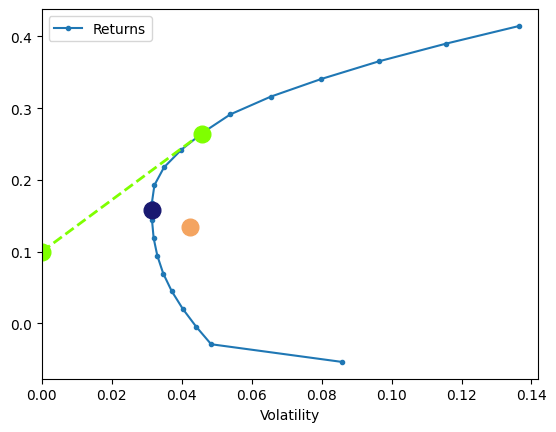

In [14]:
# Maximum Shapre Ratio Portfolio vs. Naive diversification portfolio(equal weights) vs.
# General Minimum Volatility
rk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1 ,show_ew=True, show_gmv=True)

While the MSR portfolio(green) is theoretically optimal, achieving it in practice is hampered by the difficulty of accurately estimating expected returns. This uncertainty makes the GMV portfolio(darkblue) a more reliable choice for those looking to minimize volatility without having to make potentially erroneous return predictions. The EW portfolio(sandybrown) serves as a benchmark for diversification, a naive guess.